In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector

In [12]:
SQL_PATH = 'queries.sql'

In [43]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1040"
)   

In [44]:
def run_query():
    try:
        # Create a cursor
        cur = conn.cursor(dictionary=True)  # ✅ returns rows as dictionaries

        # Read the SQL file
        with open(SQL_PATH, 'r') as file:
            sql_script = file.read().strip()

        # Split into individual statements
        statements = [s.strip() for s in sql_script.split(';') if s.strip()]

        results = []  # list to store query results

        for stmt in statements:
            if stmt.upper().startswith("SELECT"):
                cur.execute(stmt)
                rows = cur.fetchall()

                # Store results in a list of dicts
                results.extend(rows)
            else:
                cur.execute(stmt)

        conn.commit()
        print("Query executed successfully!")

        # Convert to DataFrame for easier viewing
        df = pd.DataFrame(results)
        return df 
    
    except Exception as e:
        print(f"Error while executing SQL script: {e}")

    finally:
        cur.close() # type: ignore
        conn.close()

df = run_query()

Query executed successfully!


In [45]:
df

,department,max_salary
0,IT,91000
1,HR,295000
2,Finance,305000
3,Marketing,320000


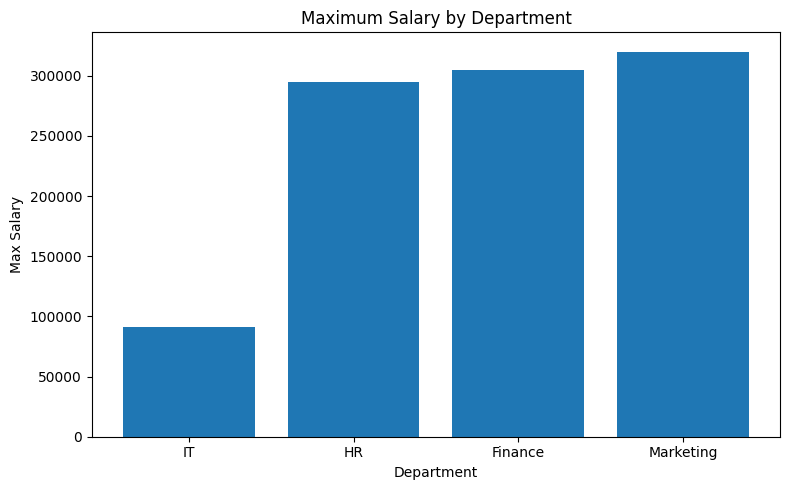

In [ ]:
# Extract data into separate lists
departments = df['department'] # pyright: ignore[reportOptionalSubscript]
salaries = df['max_salary'] # type: ignore

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(departments, salaries)
plt.xlabel("Department")
plt.ylabel("Max Salary")
plt.title("Maximum Salary by Department")
plt.tight_layout()
plt.show()